In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests

In [2]:
#parameters for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [3]:
#parameters for matplotlib
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = [14,9]

In [4]:
#Preparation to download the data file from gdrive. The file is bigger than github limits.
#Creating function to download from gdrive

def download_file_from_google_drive(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    


if __name__ == "__main__":
    import sys
    if len(sys.argv) != 3:
        print("Usage: python google_drive.py drive_file_id destination_file_path")
    else:
        # TAKE ID FROM SHAREABLE LINK
        file_id = sys.argv[1]
        # DESTINATION FILE ON YOUR DISK
        destination = sys.argv[2]
        download_file_from_google_drive(file_id, destination)

In [5]:
#Getting the dataset
gfile_id = '1Wmj180Q5sjShem3PuOVs5OP4nn4-LmnQ'
gfile_name='application_data.zip'
#download_file_from_google_drive(gfile_id, gfile_name)

In [6]:
#Functions
def convertdaystoage(valor):
    valor = int(-valor / 365.2425)
    return valor

In [7]:
#opening the file
df = pd.read_csv('application_data.zip')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


### First Cleaning

In [9]:
#Check for na or missing data
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#Dropping irrelevant collums and collums with too many NaN results
coldrops = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
            'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
            'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
            'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'HOUSETYPE_MODE', 'NAME_TYPE_SUITE', 'REGION_RATING_CLIENT', 
            'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
            'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
            'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
            'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
            'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
            'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
            'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
            'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
            'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 
            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'TOTALAREA_MODE', 
            'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
            'OWN_CAR_AGE', 'FLAG_MOBIL', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 
            'FLAG_PHONE','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'
            ]

In [11]:
df = df.drop(columns=coldrops)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1.0,0,0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,2.0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1.0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,2.0,0,0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1.0,0,0,0.0,0.0


In [12]:
#Changing DAYS_BIRTH to AGE
df.DAYS_BIRTH = df.DAYS_BIRTH / -365.2425
df.DAYS_BIRTH = df.DAYS_BIRTH.astype(int)
df.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,-637,-3648.0,-2120,1,1.0,0,0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,-1188,-1186.0,-291,1,2.0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,-225,-4260.0,-2531,1,1.0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,-3039,-9833.0,-2437,1,2.0,0,0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,-3038,-4311.0,-3458,1,1.0,0,0,0.0,0.0


### 2nd Check for NA, missing or "weird" data

In [13]:
df.isna().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
AGE                              0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_CONT_MOBILE                 0
CNT_FAM_MEMBERS                  2
REG_REGION_NOT_LIVE_REGION       0
REG_CITY_NOT_LIVE_CITY           0
DEF_30_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
dtype: int64

In [14]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [15]:
df = df[df['CODE_GENDER'] != 'XNA']

In [16]:
df.shape

(307507, 25)

In [17]:
#Drop NA
df = df.dropna()

In [18]:
df.shape

(306196, 25)

In [19]:
#Changing negative values on DAYS collumns
days_cols=[x for x in df if x.startswith('DAYS')] 
df[days_cols]= abs(df[days_cols])

In [20]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120.0,1,1.0,0,0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291.0,1,2.0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531.0,1,1.0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,3039.0,9833.0,2437.0,1,2.0,0,0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,3038.0,4311.0,3458.0,1,1.0,0,0,0.0,0.0


In [21]:
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
AGE                           0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_CONT_MOBILE              0
CNT_FAM_MEMBERS               0
REG_REGION_NOT_LIVE_REGION    0
REG_CITY_NOT_LIVE_CITY        0
DEF_30_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,306196.0,278170.513227,102786.140703,100002.0,189137.75,278197.5,367120.25,456255.0
TARGET,306196.0,0.080889,0.272666,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,306196.0,0.417096,0.722194,0.0,0.00,0.0,1.00,19.0
AMT_INCOME_TOTAL,306196.0,168664.439824,237364.314087,25650.0,112500.00,146250.0,202500.00,117000000.0
AMT_CREDIT,306196.0,599801.234103,402578.563667,45000.0,270000.00,517500.0,808650.00,4050000.0
AMT_ANNUITY,306196.0,27135.130519,14477.434025,1615.5,16573.50,24939.0,34600.50,258025.5
AMT_GOODS_PRICE,306196.0,538678.047711,369459.193287,40500.0,238500.00,450000.0,679500.00,4050000.0
AGE,306196.0,43.413000,11.944607,20.0,33.00,43.0,53.00,69.0
DAYS_EMPLOYED,306196.0,67775.668346,139485.859079,0.0,933.00,2220.0,5714.00,365243.0
DAYS_REGISTRATION,306196.0,4986.246757,3522.943923,0.0,2010.00,4504.0,7479.00,24672.0


In [23]:
#Exporting
df.to_csv('postclean.csv.zip', index=False, compression='zip')

### EDA

In [24]:
df_clean = pd.read_csv('postclean.csv.zip')
df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120.0,1,1.0,0,0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291.0,1,2.0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531.0,1,1.0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,3039.0,9833.0,2437.0,1,2.0,0,0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,3038.0,4311.0,3458.0,1,1.0,0,0,0.0,0.0


In [25]:
# binning AMT_INCOME_TOTAL column based on quantiles
df_clean['AMT_INCOME_QRANGE'] = pd.qcut(df_clean.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [26]:
# binning AMT_INCOME_TOTAL column based on values
df_clean['AMT_INCOME_RANGE'] = pd.cut(df_clean.AMT_INCOME_TOTAL,bins=[0,50000,150000,300000,500000,1000000], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])
df_clean.AMT_INCOME_RANGE.value_counts()

LOW          150162
MEDIUM       128985
HIGH          19898
VERY LOW       4502
VERY HIGH      2405
Name: AMT_INCOME_RANGE, dtype: int64

In [27]:
#Analysing the TARGET variable
df_clean.TARGET.value_counts() # 1 - Client with payment difficulties, 0 -- Client with no payment difficulties

0    281428
1     24768
Name: TARGET, dtype: int64

In [28]:
#Segmenting the data frame based on the target variable
df_target0 = df_clean.loc[df_clean.TARGET==0]
df_target1 = df_clean.loc[df_clean.TARGET==1]

In [29]:
print(df_target0.shape)
print(df_target1.shape)

(281428, 27)
(24768, 27)


In [30]:
#Finding the imbalance ratio for the TARGET variable
round(len(df_target0)/len(df_target1),2)

11.36

### Plotting

#### With TARGET
##### 1 - Client with payment difficulties
##### 0 - Client with no payment difficulties

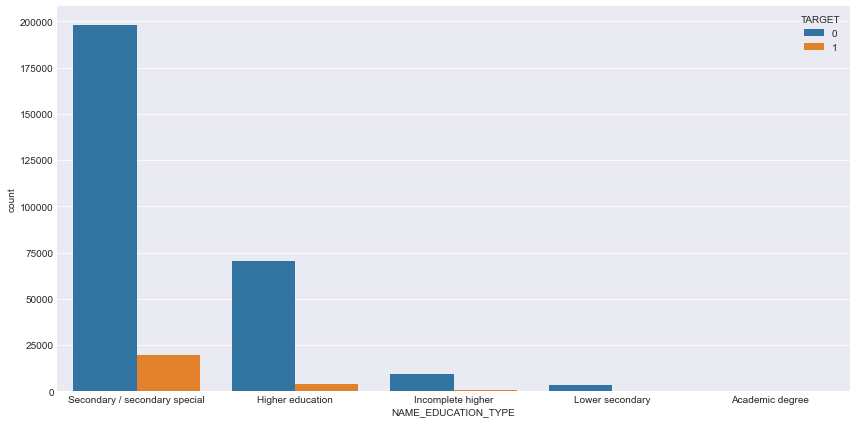

In [31]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'NAME_EDUCATION_TYPE', order = df_clean['NAME_EDUCATION_TYPE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

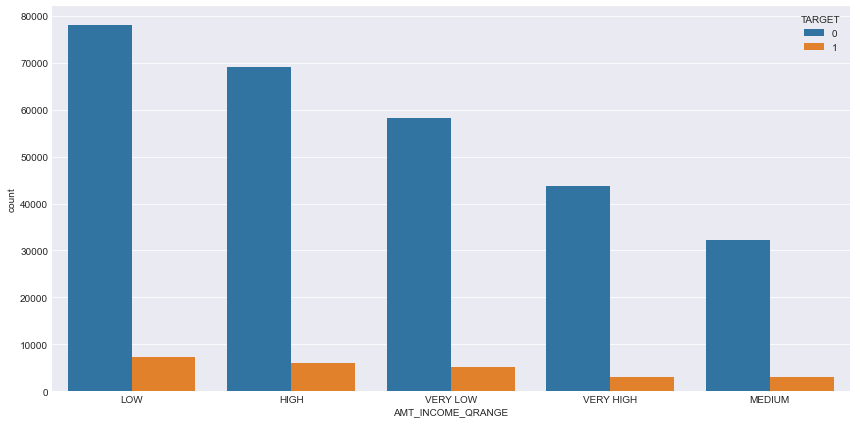

In [32]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'AMT_INCOME_QRANGE', order = df_clean['AMT_INCOME_QRANGE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

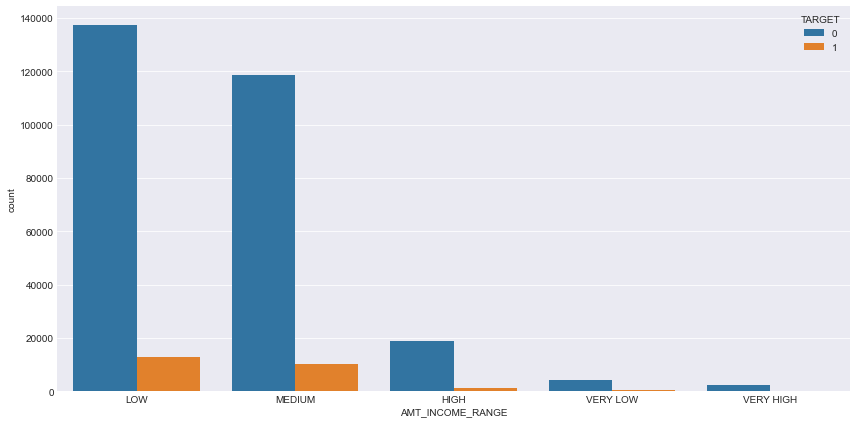

In [33]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'AMT_INCOME_RANGE', order = df_clean['AMT_INCOME_RANGE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

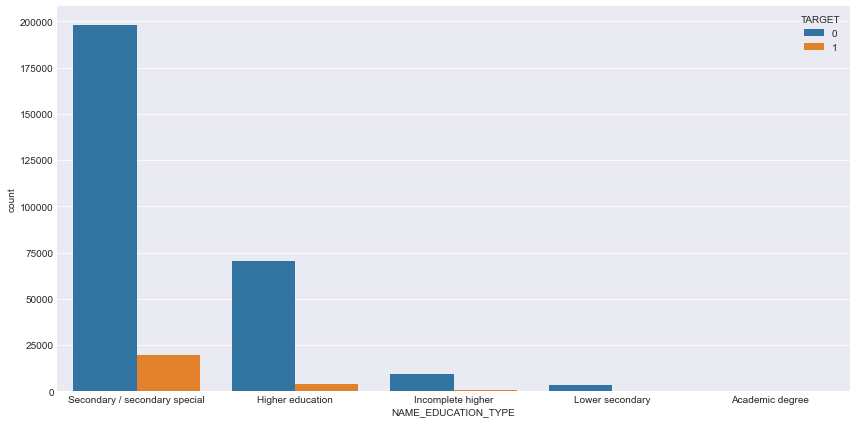

In [34]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'NAME_EDUCATION_TYPE', order = df_clean['NAME_EDUCATION_TYPE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

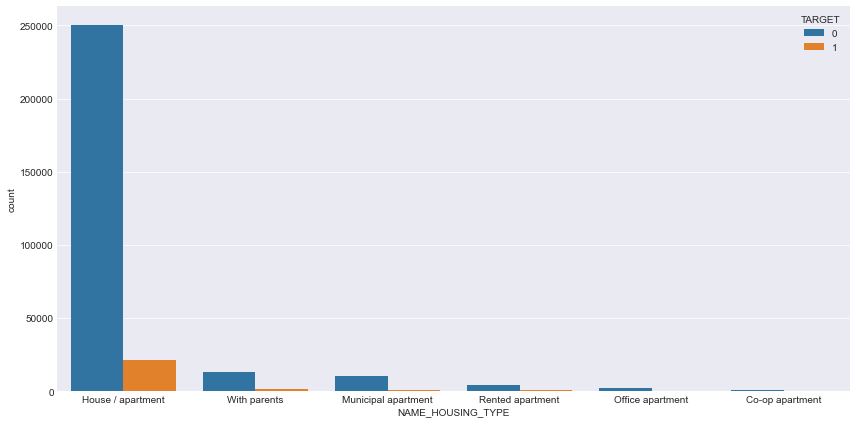

In [35]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'NAME_HOUSING_TYPE', order = df_clean['NAME_HOUSING_TYPE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

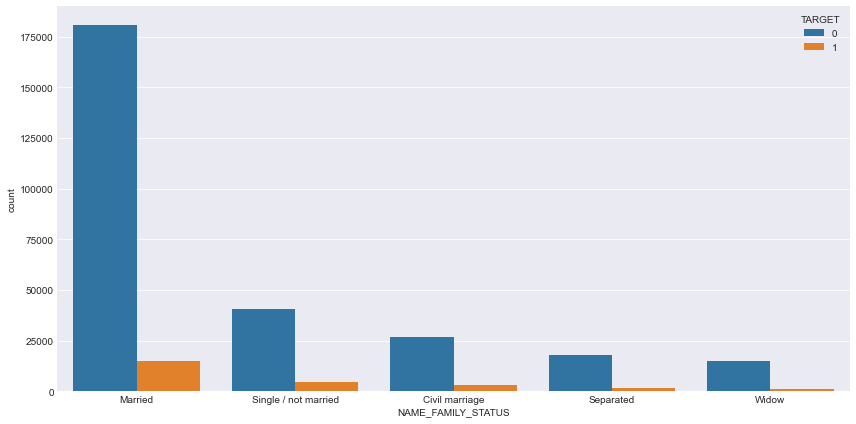

In [36]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'NAME_FAMILY_STATUS', order = df_clean['NAME_FAMILY_STATUS'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

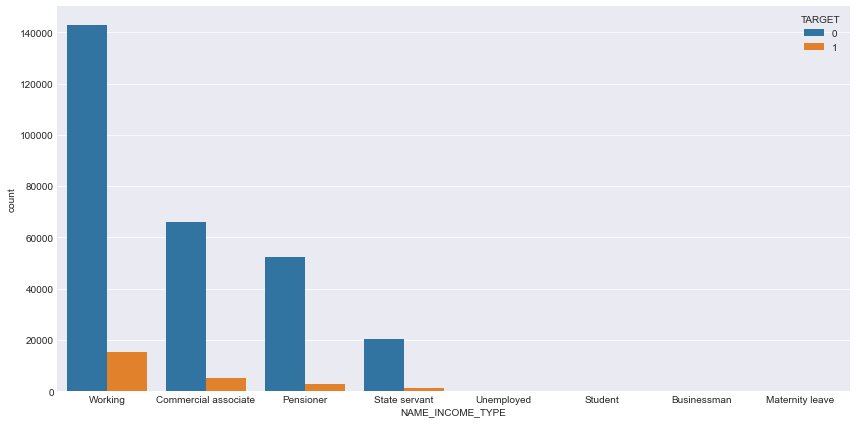

In [37]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_clean,x = 'NAME_INCOME_TYPE', order = df_clean['NAME_INCOME_TYPE'].value_counts().index, hue='TARGET')
plt.tight_layout()
plt.show()

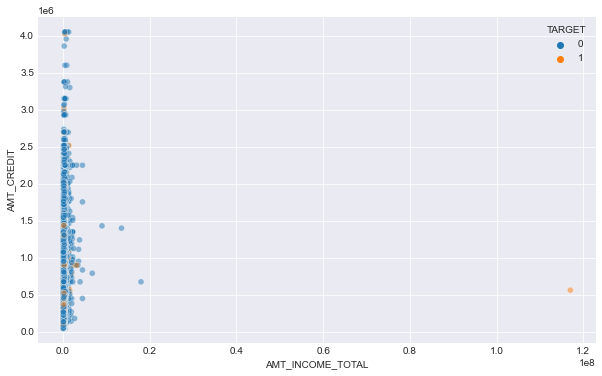

In [38]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_clean, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT', alpha=0.5, hue='TARGET')
plt.show()

#### Separating TARGET data

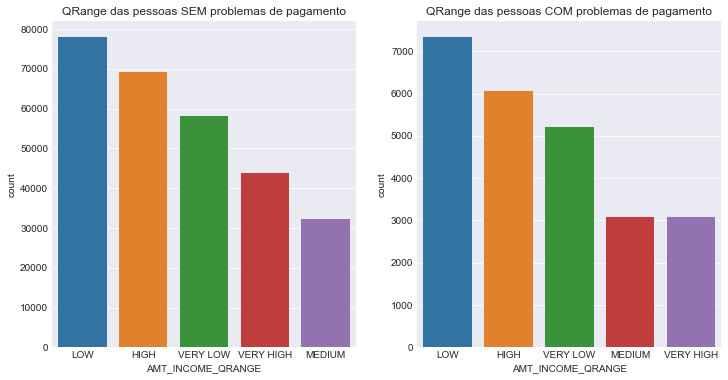

In [39]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,x = 'AMT_INCOME_QRANGE',order = df_target0['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,x = 'AMT_INCOME_QRANGE',order = df_target1['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[1])
ax[0].set_title('QRange das pessoas SEM problemas de pagamento')
ax[1].set_title('QRange das pessoas COM problemas de pagamento')
plt.show()

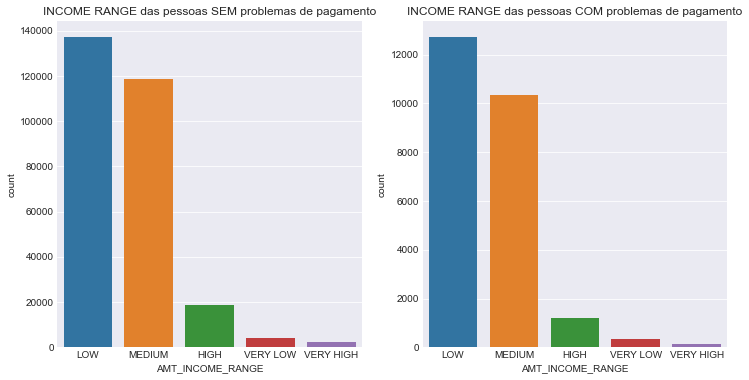

In [40]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,x = 'AMT_INCOME_RANGE',order = df_target0['AMT_INCOME_RANGE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,x = 'AMT_INCOME_RANGE',order = df_target1['AMT_INCOME_RANGE'].value_counts().index,ax=ax[1])
ax[0].set_title('INCOME RANGE das pessoas SEM problemas de pagamento')
ax[1].set_title('INCOME RANGE das pessoas COM problemas de pagamento')
plt.show()

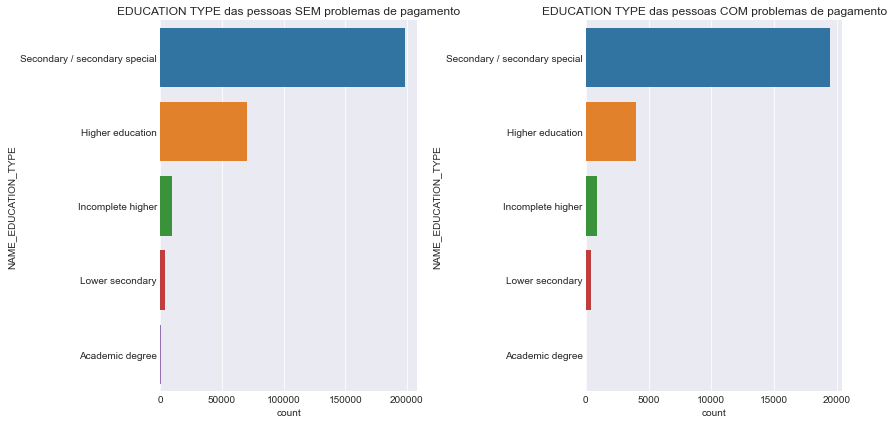

In [41]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,y = 'NAME_EDUCATION_TYPE',order = df_target0['NAME_EDUCATION_TYPE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,y = 'NAME_EDUCATION_TYPE',order = df_target1['NAME_EDUCATION_TYPE'].value_counts().index,ax=ax[1])
ax[0].set_title('EDUCATION TYPE das pessoas SEM problemas de pagamento')
ax[1].set_title('EDUCATION TYPE das pessoas COM problemas de pagamento')
fig.tight_layout()
plt.show()

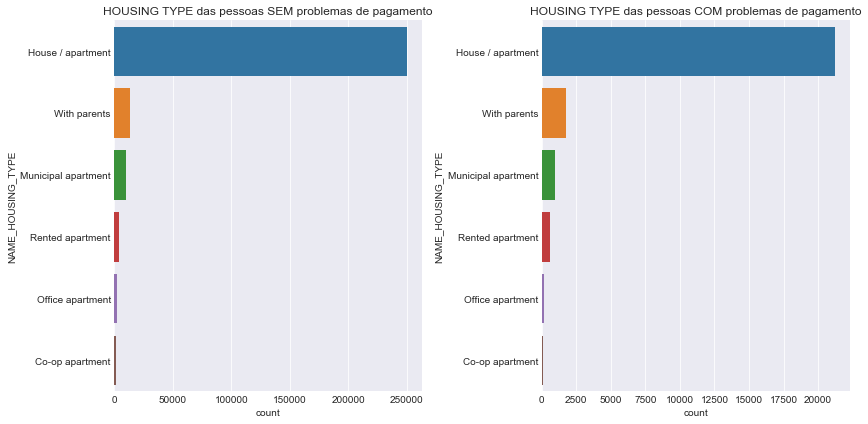

In [42]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,y = 'NAME_HOUSING_TYPE', order = df_target0['NAME_HOUSING_TYPE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,y = 'NAME_HOUSING_TYPE', order = df_target1['NAME_HOUSING_TYPE'].value_counts().index,ax=ax[1])
ax[0].set_title('HOUSING TYPE das pessoas SEM problemas de pagamento')
ax[1].set_title('HOUSING TYPE das pessoas COM problemas de pagamento')
fig.tight_layout()
plt.show()

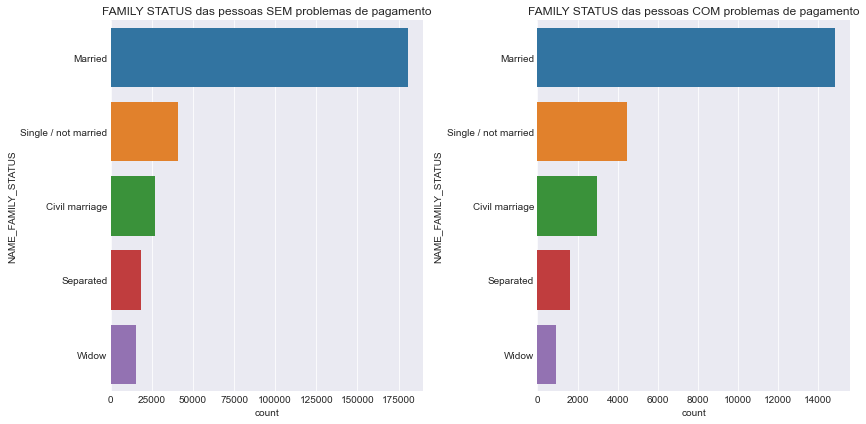

In [43]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,y = 'NAME_FAMILY_STATUS', order = df_target0['NAME_FAMILY_STATUS'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,y = 'NAME_FAMILY_STATUS', order = df_target1['NAME_FAMILY_STATUS'].value_counts().index,ax=ax[1])
ax[0].set_title('FAMILY STATUS das pessoas SEM problemas de pagamento')
ax[1].set_title('FAMILY STATUS das pessoas COM problemas de pagamento')
fig.tight_layout()
plt.show()

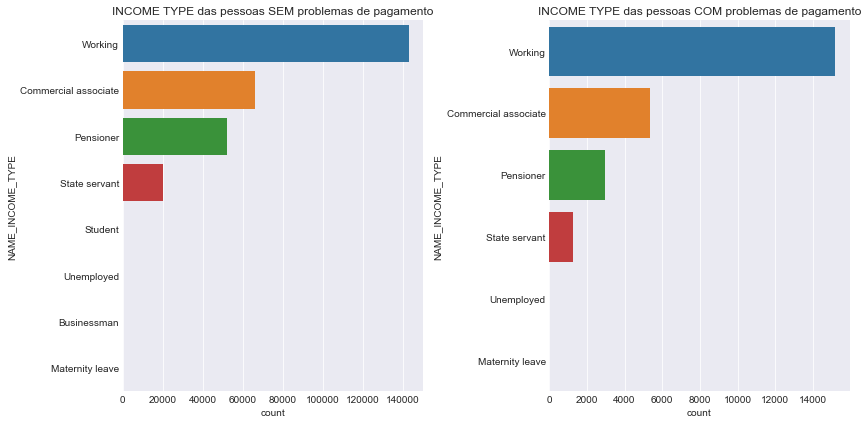

In [44]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0,y = 'NAME_INCOME_TYPE', order = df_target0['NAME_INCOME_TYPE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,y = 'NAME_INCOME_TYPE', order = df_target1['NAME_INCOME_TYPE'].value_counts().index,ax=ax[1])
ax[0].set_title('INCOME TYPE das pessoas SEM problemas de pagamento')
ax[1].set_title('INCOME TYPE das pessoas COM problemas de pagamento')
fig.tight_layout()
plt.show()

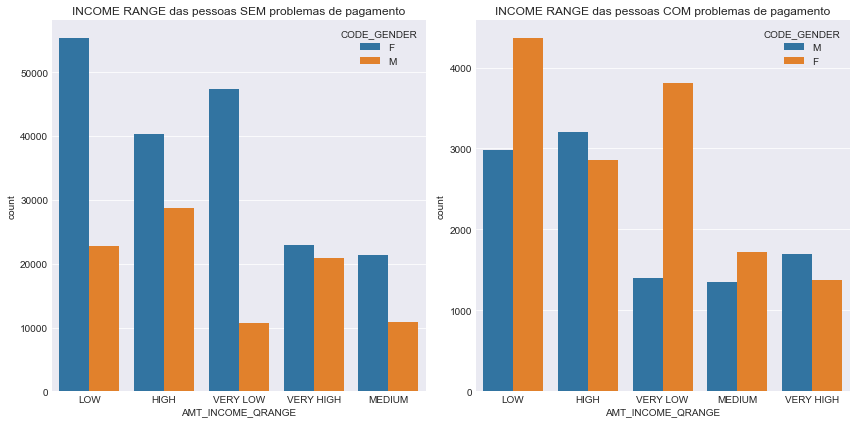

In [45]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.countplot(data=df_target0, x = 'AMT_INCOME_QRANGE', order=df_target0.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER', ax=ax[0])
sns.countplot(data=df_target1, x = 'AMT_INCOME_QRANGE', order=df_target1.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER', ax=ax[1])
ax[0].set_title('INCOME RANGE das pessoas SEM problemas de pagamento')
ax[1].set_title('INCOME RANGE das pessoas COM problemas de pagamento')
fig.tight_layout()
plt.show()

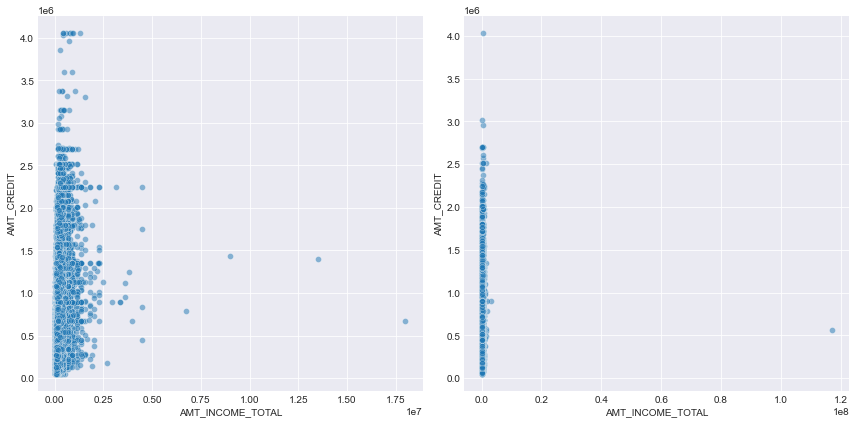

In [46]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
sns.scatterplot(data=df_target0, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT', alpha=0.5,ax=ax[0])
sns.scatterplot(data=df_target1, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT', alpha=0.5,ax=ax[1])
fig.tight_layout()
plt.show()

#### PAIRPLOTS

<Figure size 720x432 with 0 Axes>

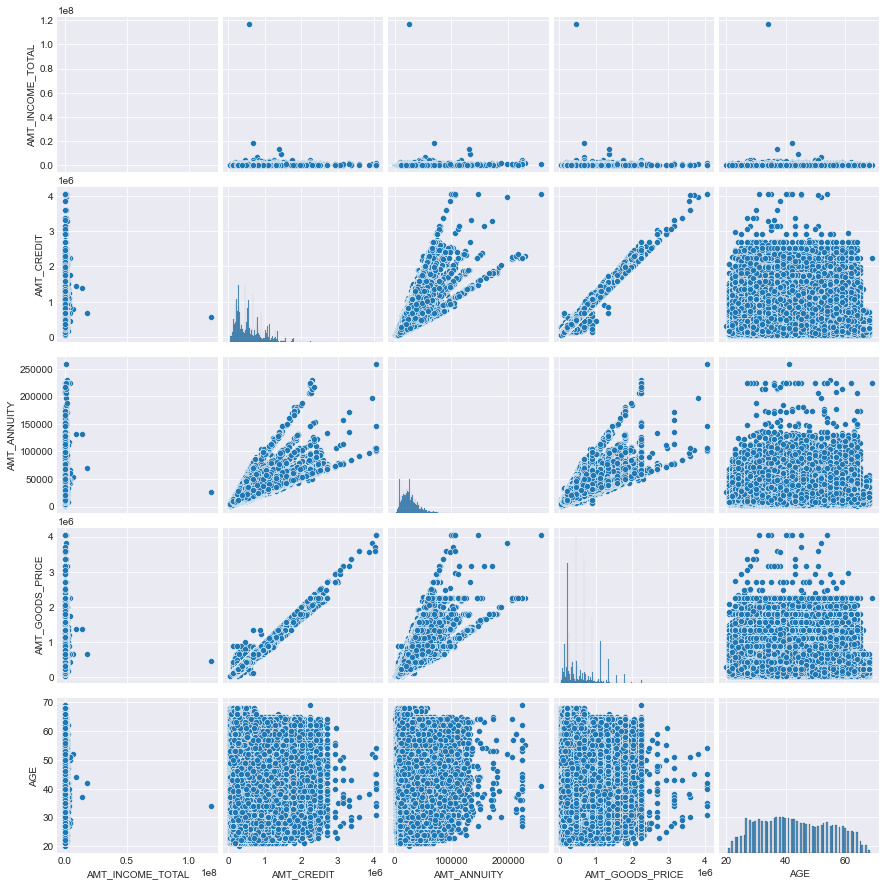

In [47]:
plt.figure(figsize=[10,6])
sns.pairplot(df_clean[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']])
plt.show()

<Figure size 720x432 with 0 Axes>

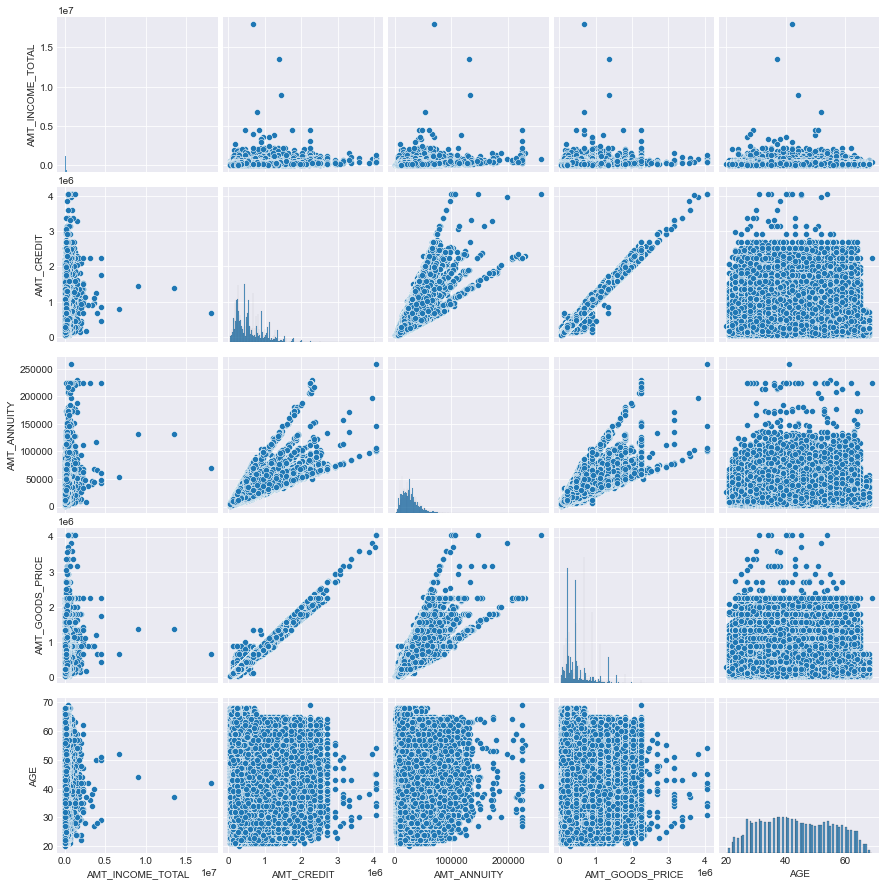

In [48]:
plt.figure(figsize=[10,6])
sns.pairplot(df_target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']])
plt.show()

<Figure size 720x432 with 0 Axes>

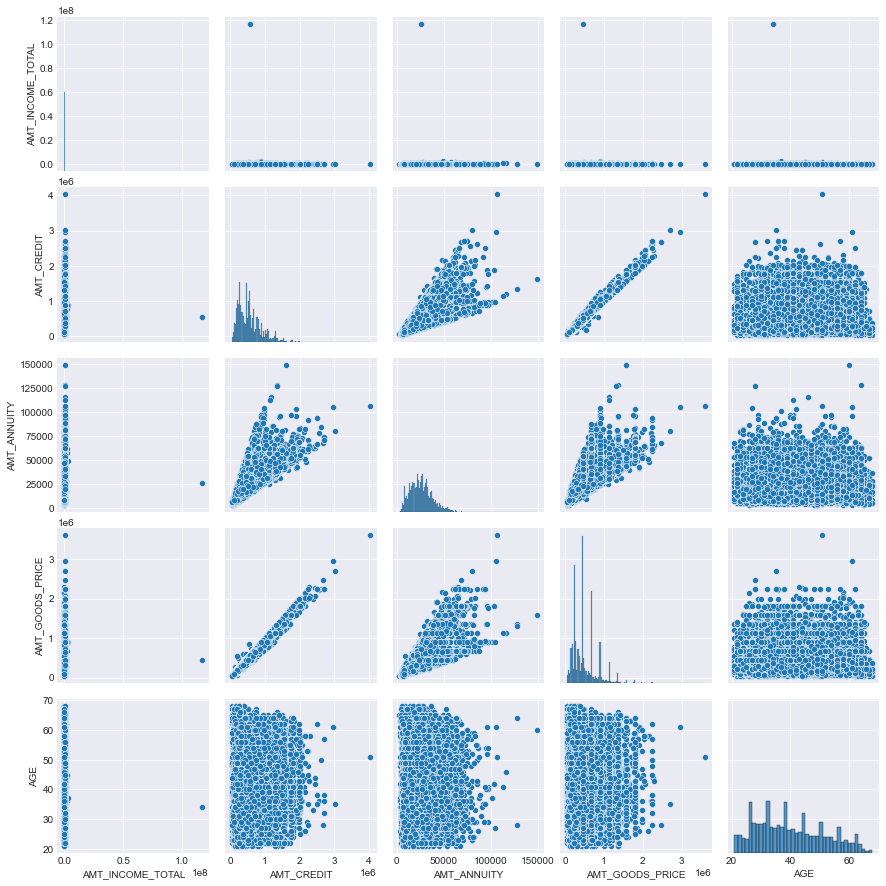

In [49]:
plt.figure(figsize=[10,6])
sns.pairplot(df_target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']])
plt.show()

In [50]:
# Finding the correlation matrix for numeric columns for Target=0 
target0_corr = df_target0[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target0_corr

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.770328,0.418158,0.775812,0.021650,0.076353,-0.013275,-0.106168,-0.039580,-0.014674
AMT_CREDIT,0.770328,1.000000,0.342318,0.987251,0.003541,0.064858,0.046827,-0.070901,-0.013500,0.001062
AMT_INCOME_TOTAL,0.418158,0.342318,1.000000,0.348788,0.028212,0.034761,-0.063509,-0.141478,-0.065206,-0.023442
AMT_GOODS_PRICE,0.775812,0.987251,0.348788,1.000000,-0.000202,0.063067,0.044373,-0.069184,-0.015911,0.003368
CNT_CHILDREN,0.021650,0.003541,0.028212,-0.000202,1.000000,0.878634,-0.337451,-0.245326,-0.185966,0.028639
CNT_FAM_MEMBERS,0.076353,0.064858,0.034761,0.063067,0.878634,1.000000,-0.286564,-0.238613,-0.175737,0.020102
AGE,-0.013275,0.046827,-0.063509,0.044373,-0.337451,-0.286564,1.000000,0.626417,0.333393,0.270429
DAYS_EMPLOYED,-0.106168,-0.070901,-0.141478,-0.069184,-0.245326,-0.238613,0.626417,1.000000,0.214824,0.276718
DAYS_REGISTRATION,-0.039580,-0.013500,-0.065206,-0.015911,-0.185966,-0.175737,0.333393,0.214824,1.000000,0.100347
DAYS_ID_PUBLISH,-0.014674,0.001062,-0.023442,0.003368,0.028639,0.020102,0.270429,0.276718,0.100347,1.000000


In [51]:
# Finding the correlation matrix for numeric columns for Target=0 
target1_corr = df_target1[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target1_corr

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.751619,0.046334,0.752442,0.030960,0.075564,0.013911,-0.081103,-0.034357,0.016255
AMT_CREDIT,0.751619,1.000000,0.038043,0.983097,-0.001960,0.051065,0.135375,0.002212,0.025937,0.052010
AMT_INCOME_TOTAL,0.046334,0.038043,1.000000,0.037548,0.004777,0.006649,-0.003167,-0.014959,-0.000151,0.004195
AMT_GOODS_PRICE,0.752442,0.983097,0.037548,1.000000,-0.008480,0.047108,0.135848,0.006951,0.025806,0.055842
CNT_CHILDREN,0.030960,-0.001960,0.004777,-0.008480,1.000000,0.885558,-0.259226,-0.192843,-0.149190,0.032368
CNT_FAM_MEMBERS,0.075564,0.051065,0.006649,0.047108,0.885558,1.000000,-0.203437,-0.186397,-0.145772,0.031607
AGE,0.013911,0.135375,-0.003167,0.135848,-0.259226,-0.203437,1.000000,0.582920,0.288758,0.251763
DAYS_EMPLOYED,-0.081103,0.002212,-0.014959,0.006951,-0.192843,-0.186397,0.582920,1.000000,0.192529,0.229072
DAYS_REGISTRATION,-0.034357,0.025937,-0.000151,0.025806,-0.149190,-0.145772,0.288758,0.192529,1.000000,0.096703
DAYS_ID_PUBLISH,0.016255,0.052010,0.004195,0.055842,0.032368,0.031607,0.251763,0.229072,0.096703,1.000000


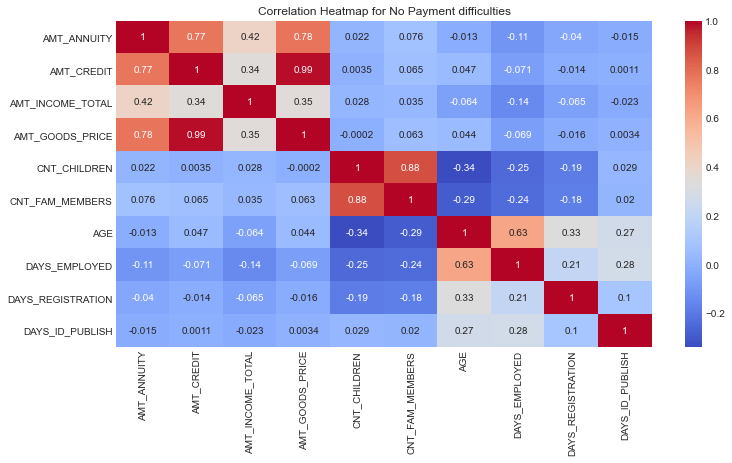

In [52]:
plt.figure(figsize=[12,6])
sns.heatmap(data=target0_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for No Payment difficulties')
plt.show()

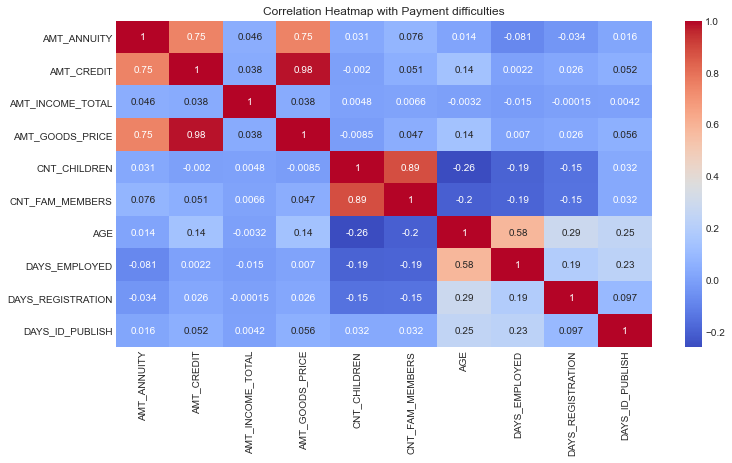

In [53]:
plt.figure(figsize=[12,6])
sns.heatmap(data=target1_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap with Payment difficulties')
plt.show()

### Last Prep

In [54]:
df_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_QRANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120.0,1,1.0,0,0,2.0,2.0,HIGH,MEDIUM
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291.0,1,2.0,0,0,0.0,0.0,VERY HIGH,MEDIUM
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531.0,1,1.0,0,0,0.0,0.0,VERY LOW,LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,3039.0,9833.0,2437.0,1,2.0,0,0,0.0,0.0,LOW,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,3038.0,4311.0,3458.0,1,1.0,0,0,0.0,0.0,LOW,LOW


In [55]:
#Dropping the ID and created bins
df_clean = df_clean.drop(columns=['SK_ID_CURR', 'AMT_INCOME_QRANGE', 'AMT_INCOME_RANGE'], axis = 1)

In [56]:
#Converting Y/N flags to float
df_clean = df_clean.replace({'N': float(0.0), 'Y': float(1.0)})
#Converting Gender F/M flags to float
df_clean = df_clean.replace({'F': float(0.0), 'M': float(1.0)})

In [57]:
df_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,Cash loans,1.0,0.0,1.0,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,637.0,3648.0,2120.0,1,1.0,0,0,2.0,2.0
1,0,Cash loans,0.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,1188.0,1186.0,291.0,1,2.0,0,0,0.0,0.0
2,0,Revolving loans,1.0,1.0,1.0,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,225.0,4260.0,2531.0,1,1.0,0,0,0.0,0.0
3,0,Cash loans,0.0,0.0,1.0,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,3039.0,9833.0,2437.0,1,2.0,0,0,0.0,0.0
4,0,Cash loans,1.0,0.0,1.0,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,3038.0,4311.0,3458.0,1,1.0,0,0,0.0,0.0


In [58]:
#Importing Scaler
from sklearn.preprocessing import RobustScaler

In [59]:
#Selecting columns to scale
scalecols = ['AMT_INCOME_TOTAL',
             'AMT_CREDIT',
             'AMT_ANNUITY',
             'AMT_GOODS_PRICE',
             'DAYS_EMPLOYED',
             'DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH',
             ]

In [60]:
rs = RobustScaler()
df_clean[scalecols] = rs.fit_transform(df_clean[scalecols])

##### Testing Dummy Variables

In [61]:
df.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [62]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [63]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [64]:
df.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [65]:
df.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [66]:
#Converting variables through OHC
colunas = ['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
cleardata=pd.get_dummies(df_clean, columns=colunas)

In [67]:
#Rearranging data
cleardata = cleardata[['CODE_GENDER',
                      'AGE',
                      'AMT_INCOME_TOTAL',
                      'AMT_CREDIT',
                      'AMT_ANNUITY',
                      'AMT_GOODS_PRICE',
                      'DAYS_EMPLOYED',
                      'DAYS_REGISTRATION',
                      'DAYS_ID_PUBLISH',
                      'DEF_30_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE',
                      'CNT_CHILDREN',
                      'CNT_FAM_MEMBERS',
                      'FLAG_OWN_CAR',
                      'FLAG_OWN_REALTY',
                      'FLAG_CONT_MOBILE',
                      'REG_REGION_NOT_LIVE_REGION',
                      'REG_CITY_NOT_LIVE_CITY',
                      'NAME_CONTRACT_TYPE_Cash loans',
                      'NAME_CONTRACT_TYPE_Revolving loans',
                      'NAME_INCOME_TYPE_Businessman',
                      'NAME_INCOME_TYPE_Commercial associate',
                      'NAME_INCOME_TYPE_Maternity leave',
                      'NAME_INCOME_TYPE_Pensioner',
                      'NAME_INCOME_TYPE_State servant',
                      'NAME_INCOME_TYPE_Student',
                      'NAME_INCOME_TYPE_Unemployed',
                      'NAME_INCOME_TYPE_Working',
                      'NAME_EDUCATION_TYPE_Academic degree',
                      'NAME_EDUCATION_TYPE_Higher education',
                      'NAME_EDUCATION_TYPE_Incomplete higher',
                      'NAME_EDUCATION_TYPE_Lower secondary',
                      'NAME_EDUCATION_TYPE_Secondary / secondary special',
                      'NAME_FAMILY_STATUS_Civil marriage',
                      'NAME_FAMILY_STATUS_Married',
                      'NAME_FAMILY_STATUS_Separated',
                      'NAME_FAMILY_STATUS_Single / not married',
                      'NAME_FAMILY_STATUS_Widow',
                      'NAME_HOUSING_TYPE_Co-op apartment',
                      'NAME_HOUSING_TYPE_House / apartment',
                      'NAME_HOUSING_TYPE_Municipal apartment',
                      'NAME_HOUSING_TYPE_Office apartment',
                      'NAME_HOUSING_TYPE_Rented apartment',
                      'NAME_HOUSING_TYPE_With parents',
                      'TARGET']]

In [68]:
cleardata.head()

,CODE_GENDER,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_CONT_MOBILE,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,TARGET
0,1.0,25,0.625,-0.205890,-0.013230,-0.224490,-0.331102,-0.156519,-0.440264,2.0,2.0,0,1.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1,0.0,45,1.375,1.440643,0.596855,1.540816,-0.215854,-0.606692,-1.149728,0.0,0.0,0,2.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1.0,52,-0.875,-0.710109,-1.008987,-0.714286,-0.417277,-0.044615,-0.280838,0.0,0.0,0,1.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0.0,52,-0.125,-0.380242,0.263355,-0.346939,0.171303,0.974401,-0.317300,0.0,0.0,0,2.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,1.0,54,-0.275,-0.008354,-0.170494,0.142857,0.171094,-0.035290,0.078743,0.0,0.0,0,1.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [69]:
cleardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306196 entries, 0 to 306195
Data columns (total 45 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CODE_GENDER                                        306196 non-null  float64
 1   AGE                                                306196 non-null  int64  
 2   AMT_INCOME_TOTAL                                   306196 non-null  float64
 3   AMT_CREDIT                                         306196 non-null  float64
 4   AMT_ANNUITY                                        306196 non-null  float64
 5   AMT_GOODS_PRICE                                    306196 non-null  float64
 6   DAYS_EMPLOYED                                      306196 non-null  float64
 7   DAYS_REGISTRATION                                  306196 non-null  float64
 8   DAYS_ID_PUBLISH                                    306196 non-null  float6

In [70]:
cleardata.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,306196.0,0.341611,0.474251,0.000000,0.000000,0.0,1.000000,1.000000
AGE,306196.0,43.413000,11.944607,20.000000,33.000000,43.0,53.000000,69.000000
AMT_INCOME_TOTAL,306196.0,0.249049,2.637381,-1.340000,-0.375000,0.0,0.625000,1298.375000
AMT_CREDIT,306196.0,0.152792,0.747384,-0.877193,-0.459482,0.0,0.540518,6.558062
AMT_ANNUITY,306196.0,0.121825,0.803097,-1.293809,-0.464054,0.0,0.535946,12.929855
AMT_GOODS_PRICE,306196.0,0.201084,0.837776,-0.928571,-0.479592,0.0,0.520408,8.163265
DAYS_EMPLOYED,306196.0,13.711706,29.175039,-0.464338,-0.269191,0.0,0.730809,75.930349
DAYS_REGISTRATION,306196.0,0.088178,0.644166,-0.823551,-0.456025,0.0,0.543975,3.687694
DAYS_ID_PUBLISH,306196.0,-0.100976,0.585422,-1.262607,-0.595035,0.0,0.404965,1.529092
DEF_30_CNT_SOCIAL_CIRCLE,306196.0,0.143418,0.446676,0.000000,0.000000,0.0,0.000000,34.000000


### First Machine Learning Tests

#### Separating Data

In [71]:
#Separating X, y, train and test data
from sklearn.model_selection import train_test_split
X = cleardata.drop(['TARGET'],axis = 1)
y = cleardata['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

### Testing Models
#### 1st Model - LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0, max_iter=10000, n_jobs=-1)
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=0)

In [73]:
y_lreg_tpred = lreg.predict(X_train)
y_lreg_pred = lreg.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [75]:
lreg_train_acc = accuracy_score(y_train, y_lreg_tpred)
lreg_test_acc = accuracy_score(y_test, y_lreg_pred)
lreg_rog_auc_score = roc_auc_score(y_test,lreg.predict_proba(X_test)[:, 1])
print('Train Accuracy : ',lreg_train_acc)
print('Test Accuracy  : ',lreg_test_acc)
print('ROC AUC Score  : ',lreg_rog_auc_score)

Train Accuracy :  0.9188793089371152
Test Accuracy  :  0.9198889614630961
ROC AUC Score  :  0.6541168502559567


#### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtreg = DecisionTreeClassifier(random_state=0)
dtreg.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [77]:
y_dtreg_tpred = dtreg.predict(X_train)
y_dtreg_pred = dtreg.predict(X_test)
dtreg_train_acc = accuracy_score(y_train, y_dtreg_tpred)
dtreg_test_acc = accuracy_score(y_test, y_dtreg_pred)
dtreg_rog_auc_score = roc_auc_score(y_test, dtreg.predict_proba(X_test)[:, 1])
print('Train Accuracy : ',dtreg_train_acc)
print('Test Accuracy  : ',dtreg_test_acc)
print('ROC AUC Score  : ',dtreg_rog_auc_score)

Train Accuracy :  1.0
Test Accuracy  :  0.8450522534291313
ROC AUC Score  :  0.5226956832762455


#### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
nbreg = GaussianNB()
nbreg.fit(X_train, y_train)

GaussianNB()

In [79]:
y_nbreg_tpred = nbreg.predict(X_train)
y_nbreg_pred = nbreg.predict(X_test)
nbreg_train_acc = accuracy_score(y_train, y_nbreg_tpred)
nbreg_test_acc = accuracy_score(y_test, y_nbreg_pred)
nbreg_rog_auc_score = roc_auc_score(y_test, nbreg.predict_proba(X_test)[:, 1])
print('Train Accuracy : ',nbreg_train_acc)
print('Test Accuracy  : ',nbreg_test_acc)
print('ROC AUC Score  : ',nbreg_rog_auc_score)

Train Accuracy :  0.7145487352830713
Test Accuracy  :  0.7137001959503593
ROC AUC Score  :  0.6145604361914043


#### XGBoost Classifier

In [80]:
import xgboost as xgb
xgbreg = xgb.XGBClassifier(objective="binary:logistic")
xgbreg.fit(X_train, y_train)

C:\Users\Lipe\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
y_xgbreg_tpred = xgbreg.predict(X_train)
y_xgbreg_pred = xgbreg.predict(X_test)
xgbreg_train_acc = accuracy_score(y_train, y_xgbreg_tpred)
xgbreg_test_acc = accuracy_score(y_test, y_xgbreg_pred)
xgbreg_rog_auc_score = roc_auc_score(y_test, xgbreg.predict_proba(X_test)[:, 1])
print('Train Accuracy : ',xgbreg_train_acc)
print('Test Accuracy  : ',xgbreg_test_acc)
print('ROC AUC Score  : ',xgbreg_rog_auc_score)

Train Accuracy :  0.9196263818808276
Test Accuracy  :  0.9197256694970607
ROC AUC Score  :  0.6700724341900126


### Calibrating XGBoost Classifier

In [82]:
# Calibração de modelo
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[5,6,7,8,9],
             'n_estimators':[50, 90, 100 ,110 ,120, 150, 200]}]
            
xgb = xgb.XGBClassifier(objective="binary:logistic", tree_method='gpu_hist', predictor='gpu_predictor', 
                        use_label_encoder=False, n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

[23:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=1, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     predictor='gpu_predictor',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
         

In [83]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 90}

In [84]:
gsreg = gs.best_estimator_

In [85]:
from sklearn.model_selection import cross_val_score
train_score = gsreg.score(X_train, y_train)
val_score = cross_val_score(gsreg, X_train, y_train, cv=5)
test_score = gsreg.score(X_test, y_test)
print('='*80)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[23:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [86]:
y_gsreg_tpred = gsreg.predict(X_train)
y_gsreg_pred = gsreg.predict(X_test)
gsreg_train_acc = accuracy_score(y_train, y_gsreg_tpred)
gsreg_test_acc = accuracy_score(y_test, y_gsreg_pred)
gsreg_rog_auc_score = roc_auc_score(y_test, gsreg.predict_proba(X_test)[:, 1])
print('Train Accuracy : ',gsreg_train_acc)
print('Test Accuracy  : ',gsreg_test_acc)
print('ROC AUC Score  : ',gsreg_rog_auc_score)

Train Accuracy :  0.9190752624961217
Test Accuracy  :  0.9199379490529066
ROC AUC Score  :  0.6783168024595377
